<a href="https://colab.research.google.com/github/nicolassalomon96/procesamiento_imagenes_UNS/blob/main/TP4/Histograma_de_luminancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP4 - Histograma de Luminancias

### Presentado: Nicolás Salomón - email: nicolassalomon96@gmail.com

* Generar una función que como parámetro de entrada tome la luminacia de una imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. Mostrar el histograma respectivo para 5 valores de contadores diferentes.

* Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.

* Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen.

## 1. Librerias necesarias

In [31]:
import os
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## 2. Funciones necesarias

In [32]:
#Función para descargar imagen
def get_image(path):
  image = io.imread(path)
  image = image/255
  return image

#Función para mostrar una imagen RGB
def plot_image(image,title,figsize=(15,15)):
  fig, ax = plt.subplots(figsize=figsize)
  plt.imshow(image)
  plt.title(title)
  plt.show()

#Función para separar los canales Y, I y Q
def split_YIQ(YIQ):
  Y = YIQ[:,:,0]
  I = YIQ[:,:,1]
  Q = YIQ[:,:,2]
  return Y, I, Q

#Función para clipear valores del espacio YIQ
def yiq_clip(Y, I, Q):
  Y = np.clip(Y, 0, 1)
  I = np.clip(I, -0.5957, 0.5957)
  Q = np.clip(Q, -0.5226, 0.5226)
  return Y, I, Q

#Función para clipear valores del espacio RGB
def rgb_clip(R, G, B):
  R = np.clip(R, 0, 1)
  G = np.clip(G, 0, 1)
  B = np.clip(B, 0, 1)
  #Se convierten los valores a byte (valores enteros de 0 a 255)
  R = (R*255).astype(int)
  G = (G*255).astype(int)
  B = (B*255).astype(int)    
  return R, G, B

#Función para convertir una imagen del espacio RGB al YIQ
def rgb2yiq(RGB):
    '''
    input: matriz de la imagen en formato RGB normalizada
    output: matriz de la imagen en formato YIQ
    '''
    rgb2yiq_matrix = np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    #print("Matriz de conversion RGB a YIQ:")
    #print(rgb2yiq_matrix)

    #Se normalizan los valores de RGB entre 0.0 y 1.0 (ya estan normalizados al momento de leer la imagen)
    #RGB = RGB/255 

    Y = rgb2yiq_matrix[0][0] * RGB[:,:,0] + rgb2yiq_matrix[0][1] * RGB[:,:,1] + rgb2yiq_matrix[0][2] * RGB[:,:,2]
    I = rgb2yiq_matrix[1][0] * RGB[:,:,0] + rgb2yiq_matrix[1][1] * RGB[:,:,1] + rgb2yiq_matrix[1][2] * RGB[:,:,2]
    Q = rgb2yiq_matrix[2][0] * RGB[:,:,0] + rgb2yiq_matrix[2][1] * RGB[:,:,1] + rgb2yiq_matrix[2][2] * RGB[:,:,2]

    Y, I, Q = yiq_clip(Y, I, Q)
    
    YIQ = np.dstack((Y,I,Q))
    
    return YIQ

#Función para convertir una imagen del espacio YIQ al RGB 
def yiq2rgb(YIQ):
    '''
    input: matriz de la imagen en formato YIQ 
    output: matriz de la imagen en formato RGB (en bytes)
    '''
    yiq2rgb_matrix = np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    #print("Matriz de conversion YIQ a RGB:")
    #print(yiq2rgb_matrix)

    R = yiq2rgb_matrix[0][0] * YIQ[:,:,0] + yiq2rgb_matrix[0][1] * YIQ[:,:,1] + yiq2rgb_matrix[0][2] * YIQ[:,:,2]
    G = yiq2rgb_matrix[1][0] * YIQ[:,:,0] + yiq2rgb_matrix[1][1] * YIQ[:,:,1] + yiq2rgb_matrix[1][2] * YIQ[:,:,2]
    B = yiq2rgb_matrix[2][0] * YIQ[:,:,0] + yiq2rgb_matrix[2][1] * YIQ[:,:,1] + yiq2rgb_matrix[2][2] * YIQ[:,:,2]

    R, G, B = rgb_clip(R, G, B)  
    
    RGB = np.dstack((R,G,B))
    
    return RGB  

#Función para plotear una imagen y su histograma en la misma figura
def plot_image_histo(image, counts_relative_freq, bins, steps, figsize=(25,8), title='Imagen'):

  fig, axs = plt.subplots(1,2,figsize=figsize)
  
  plt.subplot(1,2,1)
  plt.imshow(image)
  plt.title(title)
  
  plt.subplot(1,2,2)
  plt.bar((bins[1:] + bins[:-1])/2, counts_relative_freq, width=bins[1] - bins[0], color='cornflowerblue', ec='black')
  plt.title("Histograma de Luminancias")
  plt.xlabel("Luminancias")
  plt.ylabel("Frecuencia %")
  plt.xticks(np.arange(0,1.01,1/steps))

  plt.tight_layout()
  plt.show()

# Función para aplicar un filtro cuadrático a la imagen
def sqr_filter(image):
  YIQ = rgb2yiq(image)
  Y, I, Q = split_YIQ(YIQ)
  Y_new = Y * Y
  YIQ_new = np.dstack((Y_new,I,Q))
  return YIQ_new

# Función para aplicar un filtro raíz cuadrada a la imagen
def sqrt_filter(image):
  YIQ = rgb2yiq(image)
  Y, I, Q = split_YIQ(YIQ)
  Y_new = Y ** 0.5
  YIQ_new = np.dstack((Y_new,I,Q))
  return YIQ_new

#Función para aplicar filtro lineal 
def lineal_filter(image, y_in_min, y_in_max):
  y_out_min = 0
  y_out_max = 1

  #Ecuación de la recta: y-y1 = m(x-x1) --> y = mx + b
  m = (y_out_max - y_out_min)/(y_in_max - y_in_min) #pendiente entre (y_in_min e y_in_max)
  b = y_out_min - m * y_in_min #ordenada al origen
  
  image_yiq = rgb2yiq(image)
  Y, I, Q = split_YIQ(image_yiq)

  Y[Y < y_in_min] = 0
  Y[Y > y_in_max] = 1
  Y = np.where((Y >= y_in_min) & (Y <= y_in_max), m * Y + b, Y)

  image_yiq_mod = np.dstack((Y, I, Q))
  return image_yiq_mod


#Función para plotear una función cuadratica
def plot_sqr_function(xmin, xmax):
  x = np.arange(xmin, xmax + 0.01, 0.01)
  plt.figure(figsize=(10,6))
  plt.plot(x, x**2)
  plt.title("Función: sqr")
  plt.show()

#Función para plotear una función raíz cuadrada
def plot_sqrt_function(xmin, xmax):
  x = np.arange(xmin, xmax + 0.01, 0.01)
  plt.figure(figsize=(10,6))
  plt.plot(x, x**0.5)
  plt.title("Función: sqrt")
  plt.show()

#Función para plotear una función lineal a trozoa
def plot_lineal_function(xmin, xmax, y_in_min, y_in_max):
  
  steps = 0.01
  x1 = np.arange(xmin, y_in_min, steps)
  x2 = np.arange(y_in_min, y_in_max, steps)
  x3 = np.arange(y_in_max + steps, xmax + steps, steps)
  
  y1 = np.zeros(len(x1))
  y2 = np.arange(xmin, xmax, (xmax - xmin)/len(x2))
  y3 = np.ones(len(x3))

  x = np.concatenate((x1,x2,x3))
  y = np.concatenate((y1,y2,y3))

  plt.figure(figsize=(10,6))
  plt.plot(x, y)
  plt.xticks(np.arange(0,1.1,0.1))
  plt.title("Función: lineal")
  plt.show()


#Función para generar los valores del histograma emplenado numpy(SOLO SE USA COMO COMPARACIÓN, para contrastar los resultados de la función desarrollada)
def generate_histo_numpy(Y, min, max, steps):
  
  bins = np.round(np.linspace(min, max, steps+1),6) #Genera las divisiones en base al número de contadores
  #Aclaración: se redondea a 6 decimales como máximo para evitar errores debido a la representación de los números con punto flotante
  counts, bins_edges = np.histogram(Y, bins)

  #Cálculo de la frecuencia relativa para generar el histograma de frecuencia
  total_counts = sum(counts)
  counts_relative_freq = np.round(((counts*100)/total_counts),2)
  return counts_relative_freq, bins_edges

#Función para generar los intervalos del histograma, dichos intervalos se generan como tuplas
def generate_bins(min, max, counters):

  aux = round(max/counters,2)
  bins = []
  for i in range(counters):
    bins.append((min, aux))
    #Aclaración: se redondea a 2 decimales como máximo para evitar errores debido a la representación de los números con punto flotante
    min = round(min + max/counters, 2) 
    aux = round(aux + max/counters, 2)
  return bins

#Función para generar los valores del histograma manualmente
def generate_histo(Y, min, max, counters):
  bins = generate_bins(min, max, counters)
  bins_dict = dict(zip(bins, [0] * len(bins)))
  for i in range(len(Y)):
    for j in range(len(Y[i])):
      for interval in bins_dict:
        if interval[0] <= Y[i][j] < interval[1]:
          bins_dict[interval] += 1
          break
  
  bins_list = []
  for i in range(len(bins)):
    bins_list = np.append(bins_list,bins[i][0])
  bins_list = np.append(bins_list,1)

  counts = np.asarray(list(bins_dict.values())) #Convierto los valores obtenidos en una lista
  total_counts_aux = sum(counts) #Suma de valores obtenidos para encontrar la frecuencia relativa
  counts_relative_freq = np.round(((counts*100)/total_counts_aux),2)
  return counts_relative_freq, bins_list

## 3. Selección de la imagen y muestra de su histograma

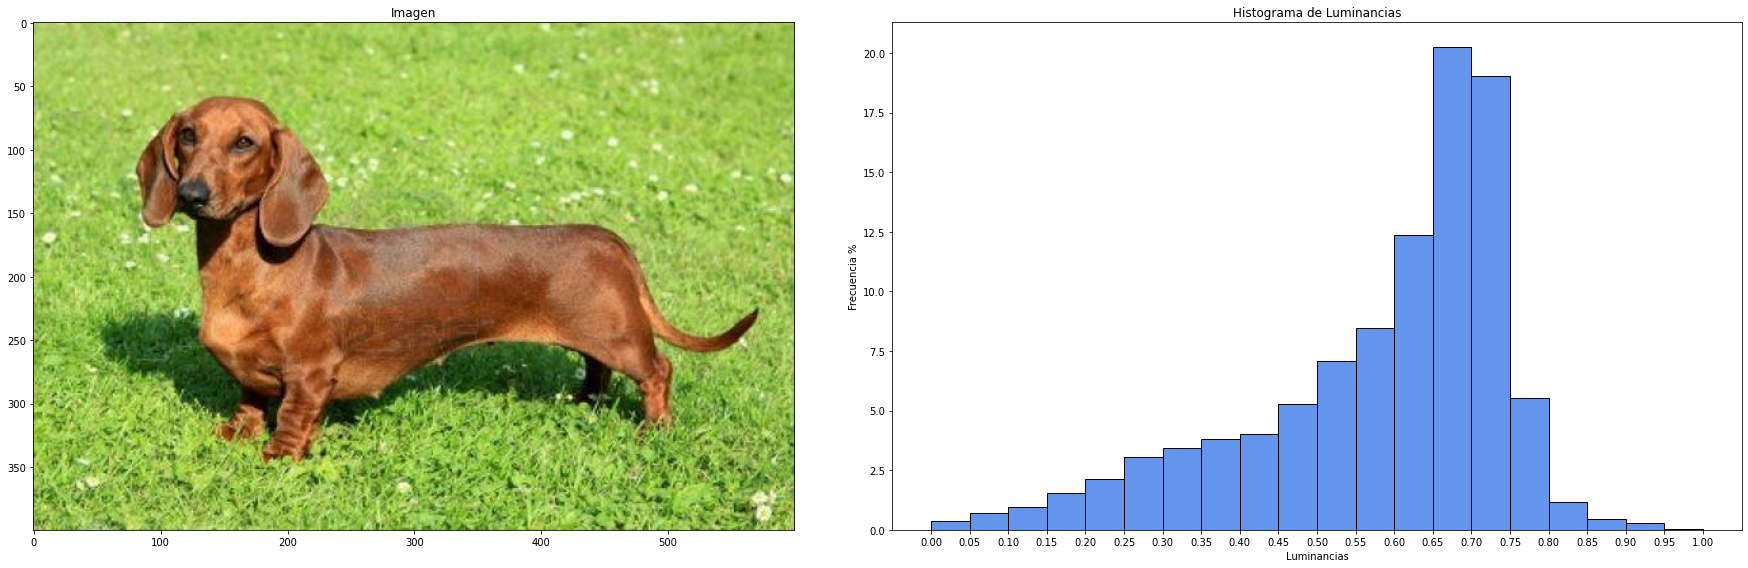

In [37]:
#@title Seleccione la imagen a analizar: { run: "auto" }
dog_url = 'https://pbs.twimg.com/media/BwURyszIYAEtRva.jpg'
route_url = 'https://cdn1.eldia.com/122017/1514109535760.jpg'
lake_url = 'https://s1.1zoom.me/prev/596/USA_Mountains_Lake_Forests_Sky_Lake_Dillon_Clouds_595131_600x400.jpg'

Imagen = 'Perro' #@param ["Perro","Lago","Ruta"]

if Imagen =='Perro':
  image_1 = get_image(dog_url)
if Imagen =='Lago':
  image_1 = get_image(lake_url)
if Imagen =='Ruta':
  image_1 = get_image(route_url)   

#@title Seleccione la cantidad de contadores: { run: "auto" }

Contadores = 20 #@param {type:"slider", min:1, max:50, step:1}
image_1_y = rgb2yiq(image_1)[:,:,0] #Extracción del canal Y (luminancia) de la imagen

counts_relative_freq, bins = generate_histo(image_1_y,0, 1, Contadores)
plot_image_histo(image_1, counts_relative_freq, bins, Contadores, figsize=(25,8))

### 3.1. Muestra para 5 valores distintos de contadores

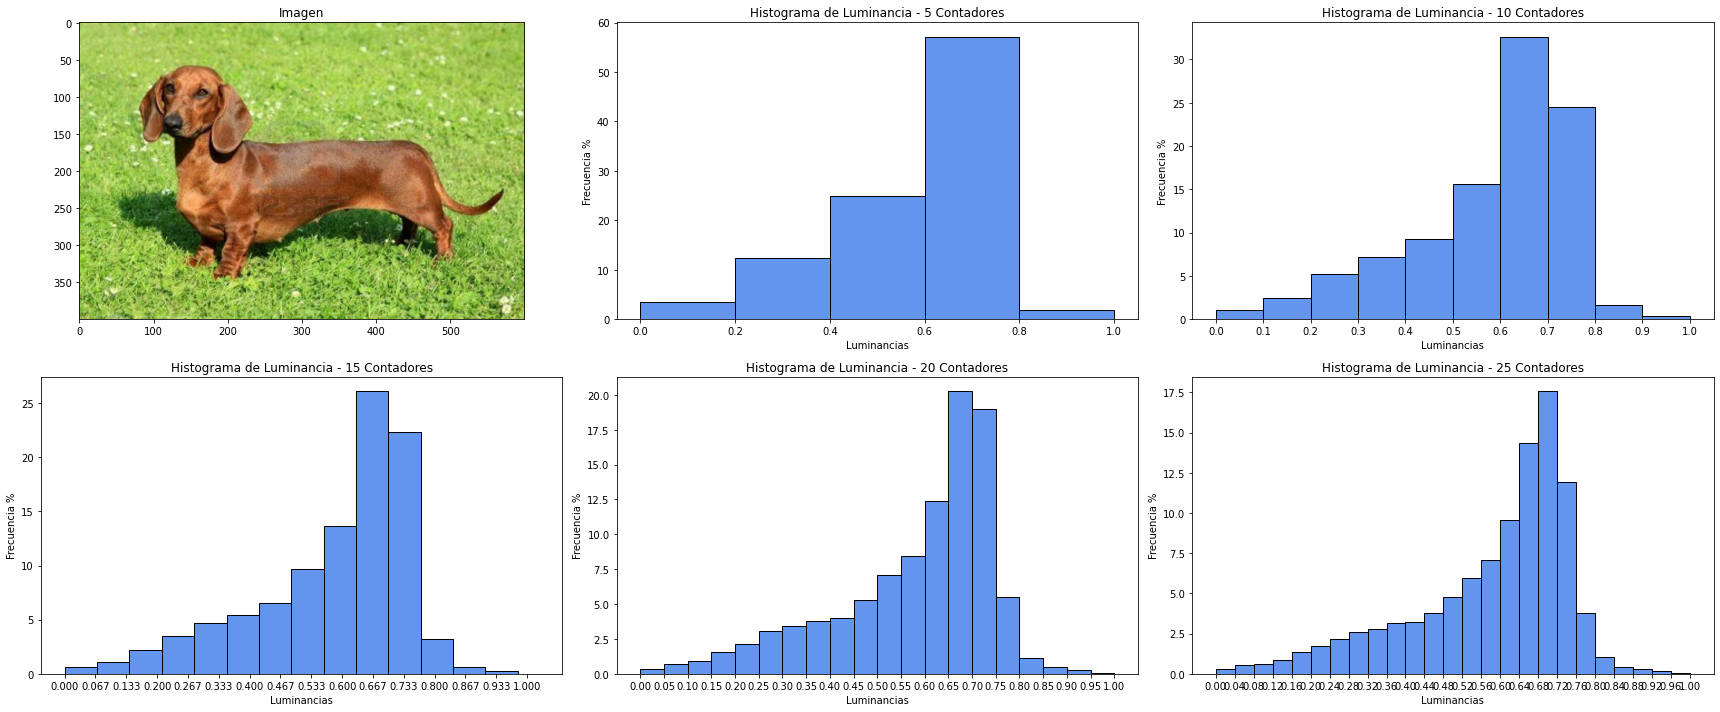

In [38]:
#@title Ingrese los 5 valores de contadores a mostrar, separados por coma (ej: 5,10,15,20,25):
#@markdown Luego de setear los contadores ejecutar la celda para ver los resultados

Contadores = '5,10,15,20,25' #@param {type:"string"}

#image_1_y = rgb2yiq(image)[:,:,0] #Extracción del canal Y (luminancia) de la imagen

fig,ax = plt.subplots(2,3,figsize=(24,10))

plt.subplot(2,3,1)
plt.imshow(image_1)
plt.title("Imagen")

for i in range(len(Contadores.split(sep=','))):
  plt.subplot(2,3,i+2)
  counts_relative_freq, bins = generate_histo(image_1_y,0, 1, int(Contadores.split(sep=',')[i]))
  plt.bar((bins[1:] + bins[:-1])/2, counts_relative_freq, width=bins[1] - bins[0], color='cornflowerblue', ec='black')
  plt.title(f"Histograma de Luminancia - {int(Contadores.split(sep=',')[i])} Contadores")
  plt.xlabel("Luminancias")
  plt.ylabel("Frecuencia %")
  plt.xticks(np.arange(0,1.01,1/int(Contadores.split(sep=',')[i])))

plt.tight_layout()
plt.show()

## 4. Elección del filtro a aplicar

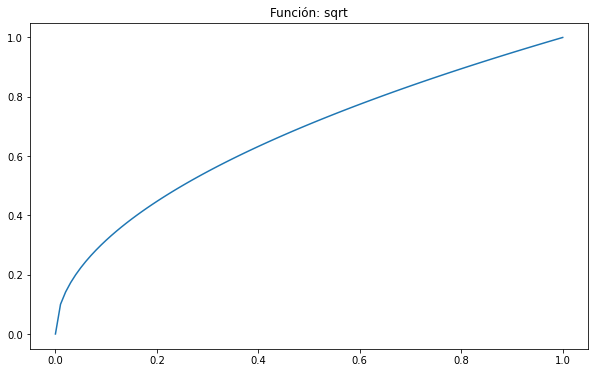

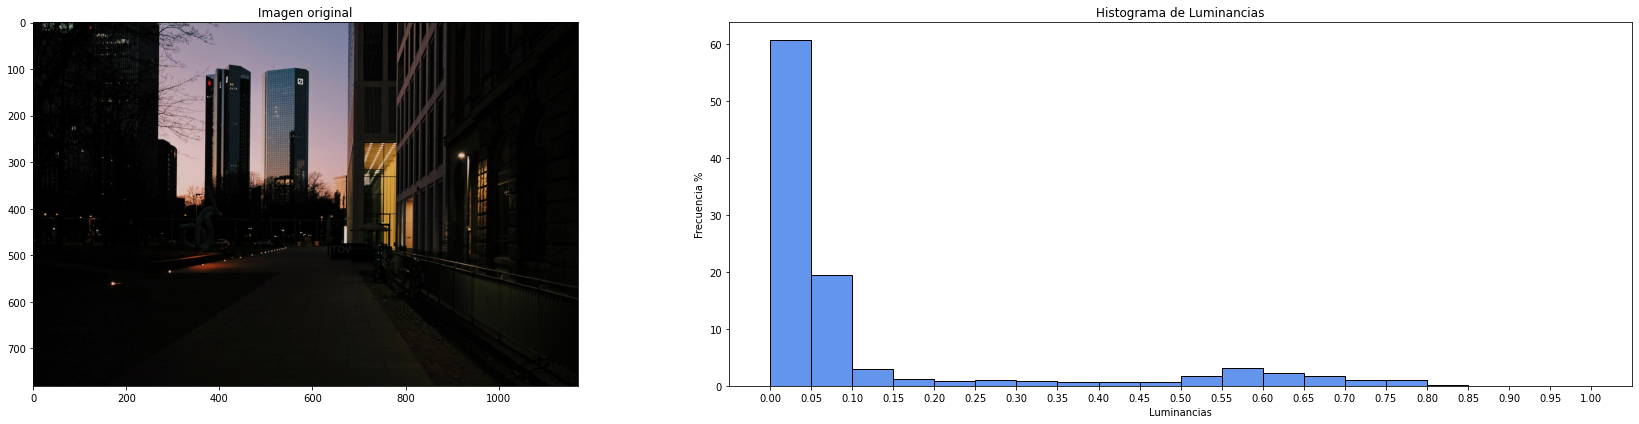

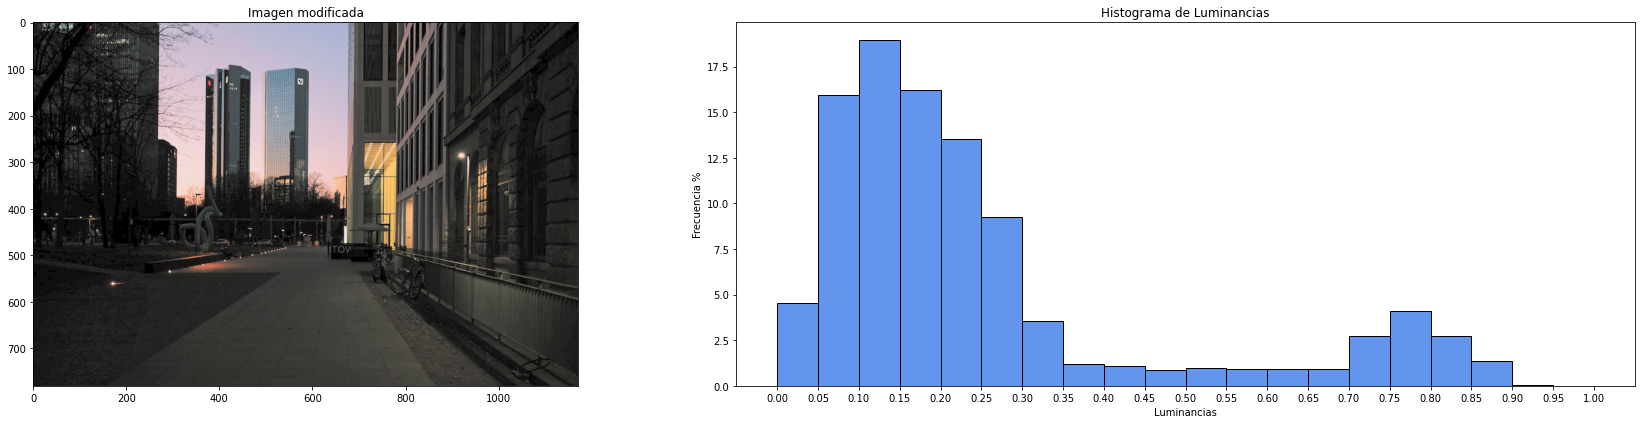

In [49]:
#@title Seleccione la imagen a analizar: { run: "auto" }
low_Y_1 = 'https://images.unsplash.com/photo-1525036984299-360cc38f470a?ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTY0fHxsb3clMjBsaWdodHxlbnwwfHwwfHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60'
low_Y_2 = 'https://images.unsplash.com/photo-1615221990091-b8203265e94c?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1171&q=80'
high_Y_1 = 'https://www.rockandpop.cl/wp-content/uploads/2020/01/photophobia.jpg'
high_Y_2 = 'https://i0.wp.com/www.iluminet.com/press/wp-content/uploads/2018/11/ugr-06.jpg?w=780&ssl=1'

Imagen = 'Baja_luminancia_2' #@param ["Baja_luminancia_1","Baja_luminancia_2","Alta_luminancia_1","Alta_luminancia_2"]

if Imagen =='Baja_luminancia_1':
  image_2 = get_image(low_Y_1)
elif Imagen =='Baja_luminancia_2':
  image_2 = get_image(low_Y_2)
elif Imagen =='Alta_luminancia_1':
  image_2 = get_image(high_Y_1)
elif Imagen =='Alta_luminancia_2':
  image_2 = get_image(high_Y_2)
else:
  print("Error")     

#@markdown Seleccione la cantidad de contadores: { run: "auto" }
Contadores_1 = 20 #@param {type:"slider", min:1, max:50, step:1}

#@markdown Seleccione la función a aplicar: { run: "auto" }
Funcion = 'Raiz_cuadrada' #@param ["Multiplicacion_alfa", "Potencia_cuadratica", "Raiz_cuadrada","Lineal"]

#@markdown Seleccione el valor alfa a multiplicar (en caso de haber elegido esta función): { run: "auto" }
Alfa = 3 #@param {type:"slider", min:0, max:5, step:0.1}

#@markdown Seleccione el valor mínimo y máximo de la función lineal a trozos (en caso de haber elegido esta función): { run: "auto" }
lower_y = 0.2 #@param {type:"slider", min:0, max:1, step:0.05}
upper_y = 0.8 #@param {type:"slider", min:0, max:1, step:0.05}

image_2_y, image_2_i, image_2_q = split_YIQ(rgb2yiq(image_2)) #Extracción del canal Y (luminancia) de la imagen

if Funcion == 'Multiplicacion_alfa':
  image_2_y_mod = image_2_y * Alfa
  YIQ_new = np.dstack((yiq_clip(image_2_y_mod, image_2_i, image_2_q))) #Nos aseguramos que no se salga de rango
elif Funcion == 'Potencia_cuadratica':
  YIQ_new = sqr_filter(image_2)
  plot_sqr_function(xmin=0, xmax=1)
elif Funcion == 'Raiz_cuadrada':
  YIQ_new = sqrt_filter(image_2)
  plot_sqrt_function(xmin=0, xmax=1)
elif Funcion == 'Lineal':
  YIQ_new = lineal_filter(image_2, lower_y, upper_y)
  plot_lineal_function(xmin=0, xmax=1, y_in_min=lower_y, y_in_max=upper_y)
else:
  print("Error")

counts_relative_freq1, bins1 = generate_histo(image_2_y,0, 1, Contadores_1)
plot_image_histo(image_2, counts_relative_freq1, bins1, Contadores_1, figsize=(25,6), title='Imagen original')

counts_relative_freq_mod, bins2 = generate_histo(YIQ_new[:,:,0],0, 1, Contadores_1)
image_2_mod_rgb = yiq2rgb(YIQ_new)
plot_image_histo(image_2_mod_rgb, counts_relative_freq_mod, bins2, Contadores_1, figsize=(25,6), title='Imagen modificada')


### 4.1. Multiplicación por un valor alfa

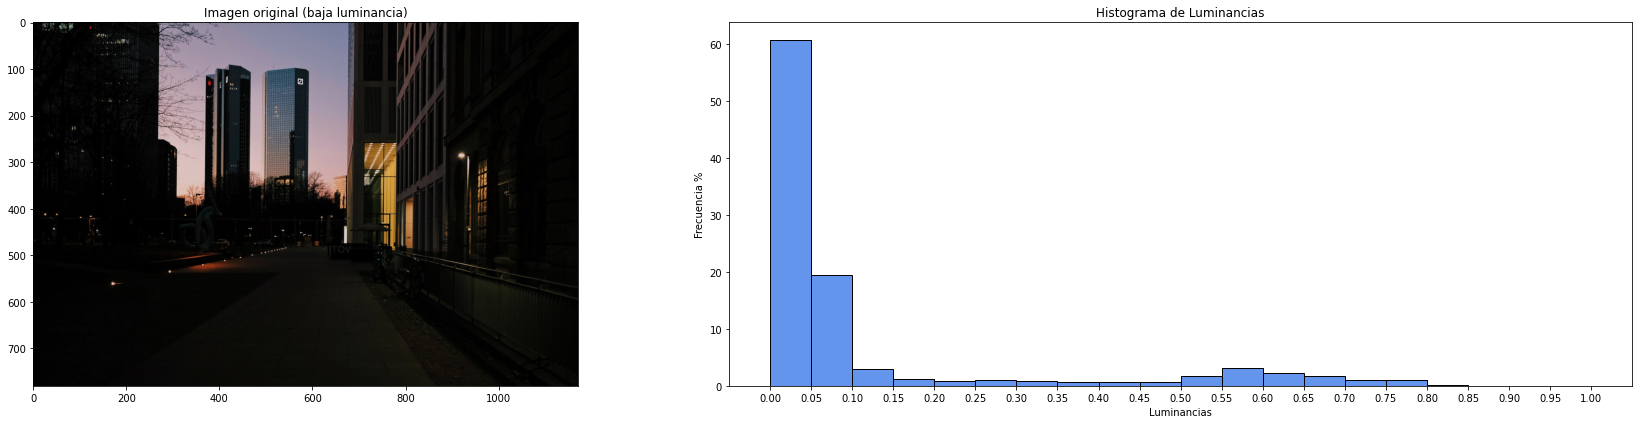

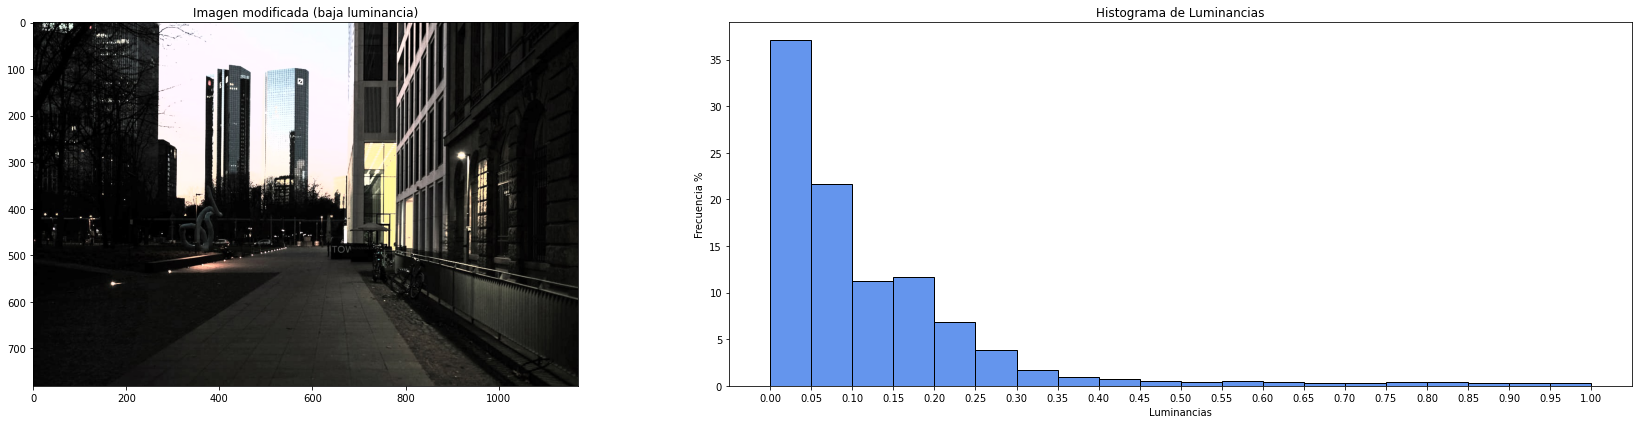

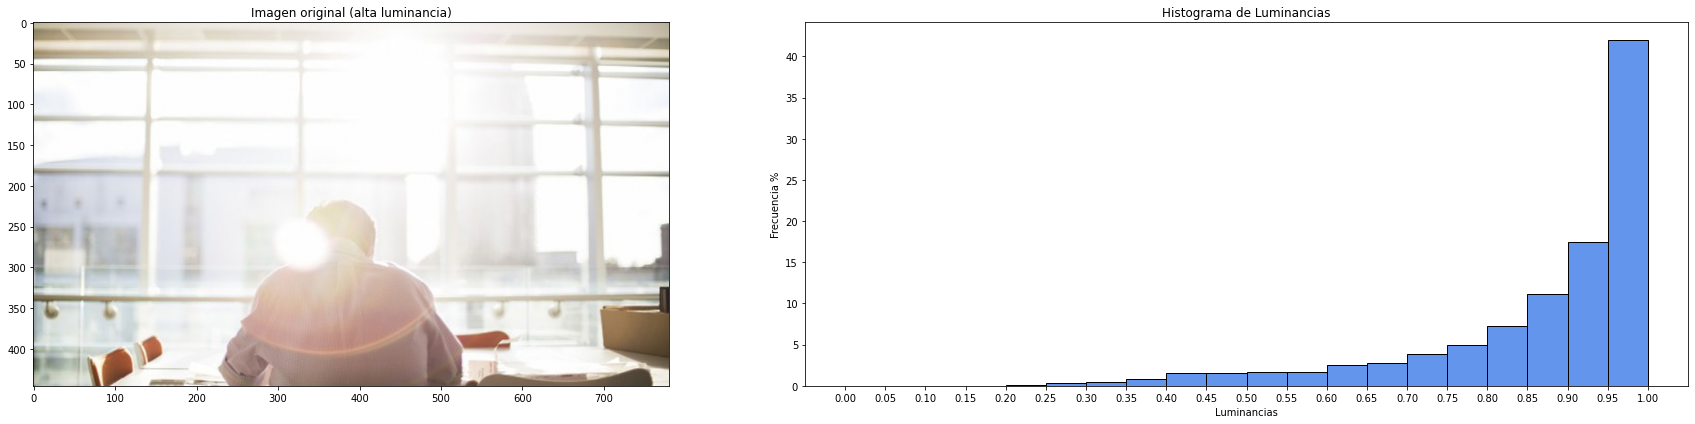

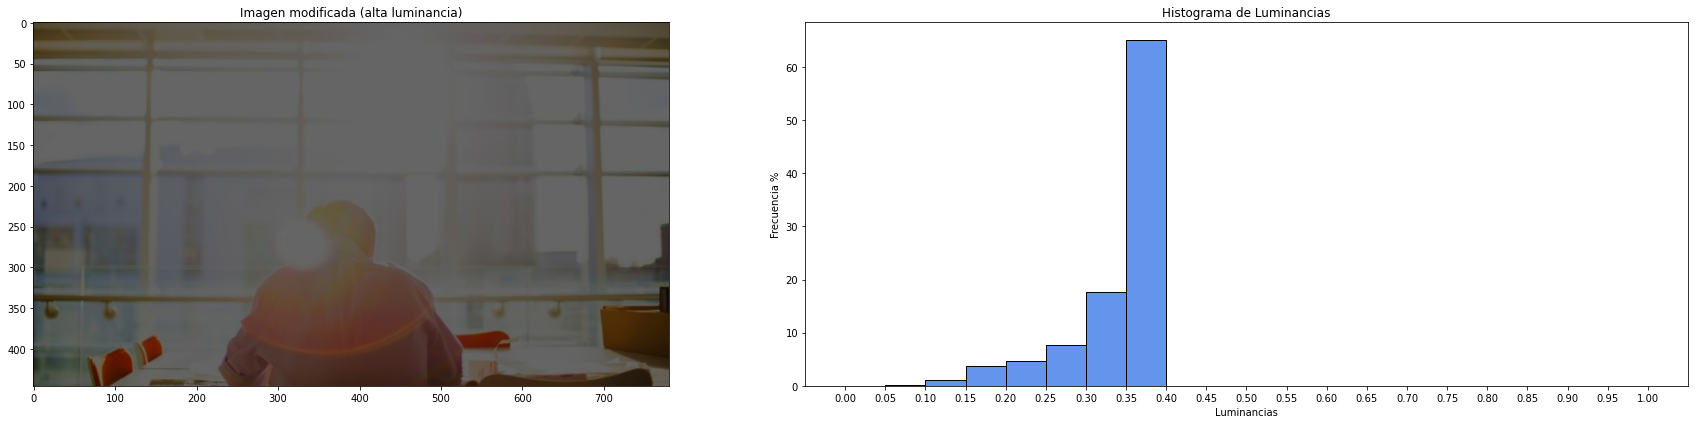

In [41]:
low_Y = get_image('https://images.unsplash.com/photo-1615221990091-b8203265e94c?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1171&q=80')
high_Y = get_image('https://i0.wp.com/www.iluminet.com/press/wp-content/uploads/2018/11/ugr-06.jpg?w=780&ssl=1')
high_Y_yiq = rgb2yiq(high_Y)
low_Y_yiq = rgb2yiq(low_Y)

counters = 20
alfa1 = 3
alfa2 = 0.4

counts_relative_freq2, bins2 = generate_histo(low_Y_yiq[:,:,0],0, 1, counters)
plot_image_histo(low_Y, counts_relative_freq2, bins2, counters, figsize=(25,6), title='Imagen original (baja luminancia)')

low_Y_mod = low_Y_yiq[:,:,0] * alfa1
YIQ_new = np.dstack((yiq_clip(low_Y_mod, low_Y_yiq[:,:,1], low_Y_yiq[:,:,2])))

counts_relative_freq_mod, bins_mod = generate_histo(YIQ_new[:,:,0], 0, 1, counters)
image_2_mod_rgb = yiq2rgb(YIQ_new)
plot_image_histo(image_2_mod_rgb, counts_relative_freq_mod, bins_mod, counters, figsize=(25,6), title='Imagen modificada (baja luminancia)')


counts_relative_freq3, bins3 = generate_histo(high_Y_yiq[:,:,0], 0, 1, counters)
plot_image_histo(high_Y, counts_relative_freq3, bins3, counters, figsize=(25,6), title='Imagen original (alta luminancia)')

high_Y_mod = high_Y_yiq[:,:,0] * alfa2
YIQ_new = np.dstack((yiq_clip(high_Y_mod, high_Y_yiq[:,:,1], high_Y_yiq[:,:,2])))

counts_relative_freq_mod, bins_mod = generate_histo(YIQ_new[:,:,0], 0, 1, counters)
image_2_mod_rgb = yiq2rgb(YIQ_new)
plot_image_histo(image_2_mod_rgb, counts_relative_freq_mod, bins_mod, counters, figsize=(25,6), title='Imagen modificada (alta luminancia)')

Observaciones: Se puede apreciar como el problema de la baja luminancia en ciertas zonas de la primer imagen si se soluciona, pero también se alteran zonas que poseían una luminancia correcta, incluso se altera al punto de "quemar" la imagen (el cielo, por ejemplo). 
Mientras que, para la segunda imagen, disminuir la luminancia multiplicando la componente Y por un valor menor a 1 resuelve el problema para la zonas con demasiada iluminación, pero empeora aquellas zonas que desde un inicio tenían baja luminancia. Además se observa como el histograma de luminancia se desplaza a la izquierda en este último caso.

### 4.2. Función de potencia cuadrática

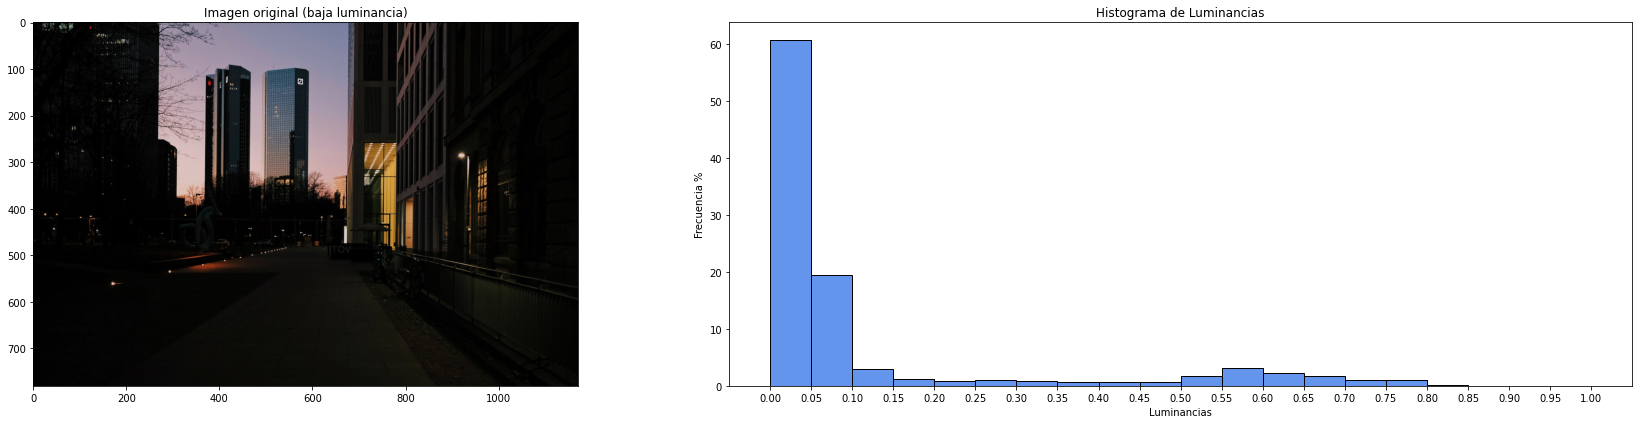

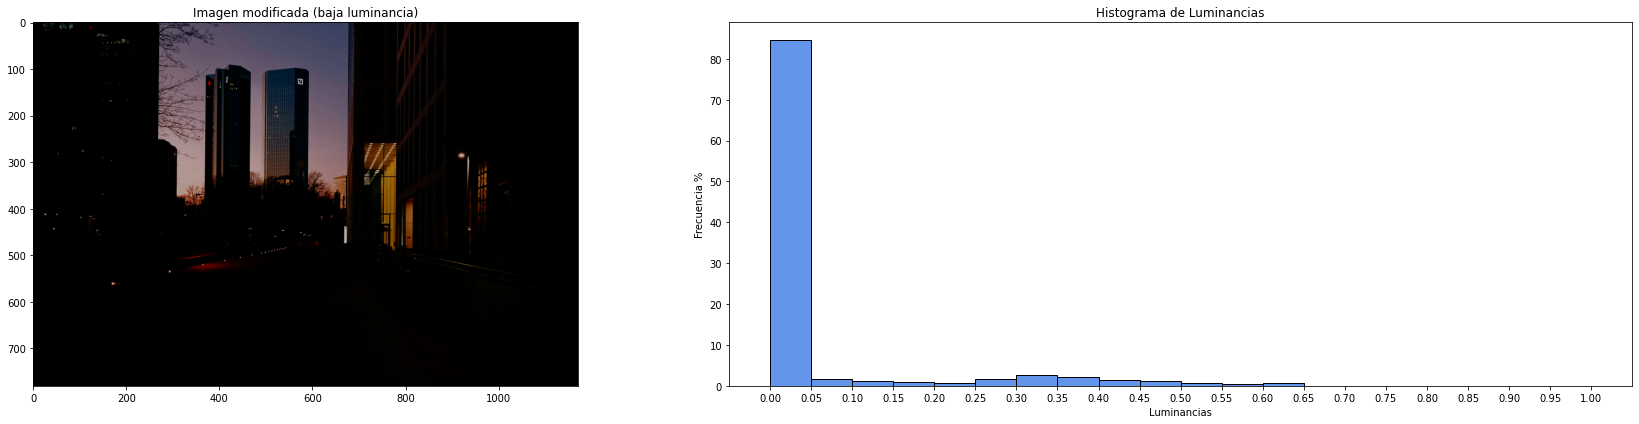

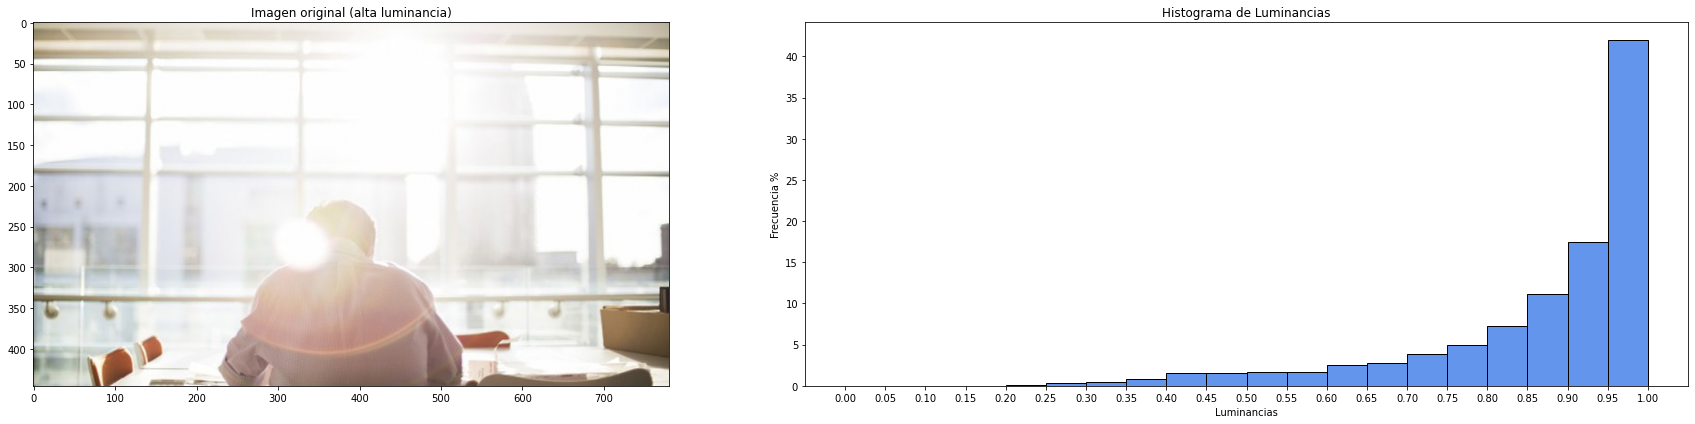

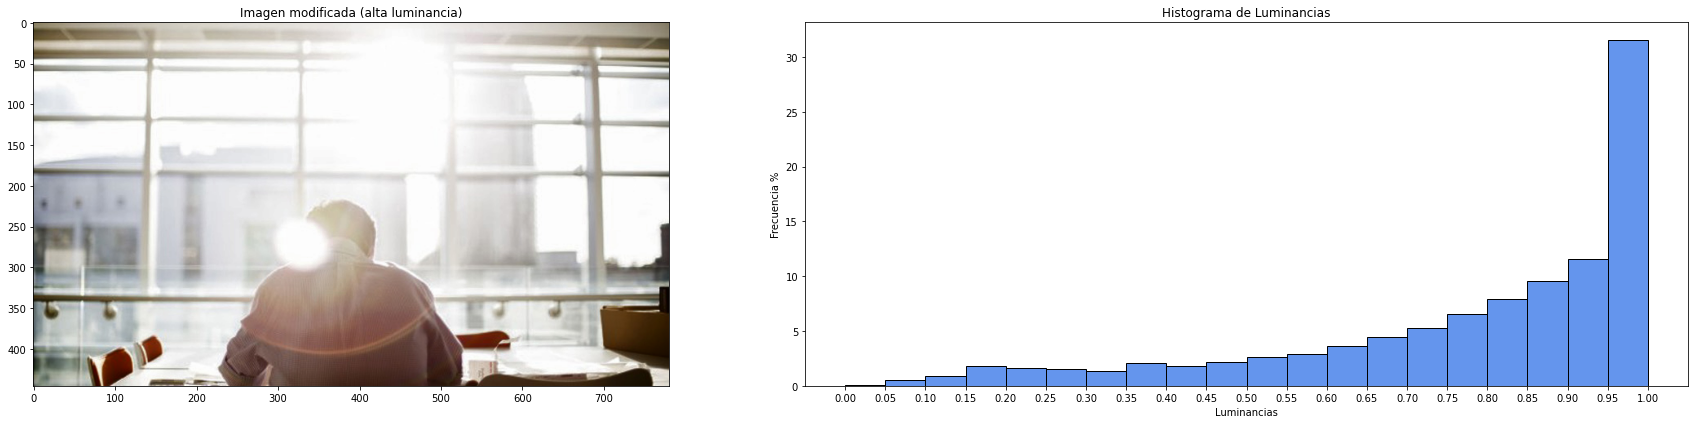

In [42]:
counters = 20

counts_relative_freq4, bins4 = generate_histo(low_Y_yiq[:,:,0], 0, 1, counters)
plot_image_histo(low_Y, counts_relative_freq4, bins4, counters, figsize=(25,6), title='Imagen original (baja luminancia)')

YIQ_new = sqr_filter(low_Y)

counts_relative_freq_mod, bins_mod = generate_histo(YIQ_new[:,:,0],0,1,counters)
image_2_mod_rgb = yiq2rgb(YIQ_new)
plot_image_histo(image_2_mod_rgb, counts_relative_freq_mod, bins_mod, counters, figsize=(25,6), title='Imagen modificada (baja luminancia)')


counts_relative_freq5, bins5 = generate_histo(high_Y_yiq[:,:,0], 0, 1, counters)
plot_image_histo(high_Y, counts_relative_freq5, bins5, counters, figsize=(25,6), title='Imagen original (alta luminancia)')

YIQ_new = sqr_filter(high_Y)

counts_relative_freq_mod, bins_mod = generate_histo(YIQ_new[:,:,0], 0, 1, counters)
image_2_mod_rgb = yiq2rgb(YIQ_new)
plot_image_histo(image_2_mod_rgb, counts_relative_freq_mod, bins_mod, counters, figsize=(25,6), title='Imagen modificada (alta luminancia)')

Observaciones: Se observa como la función de potencia cuadrática empeora aún más la primer imagen (de baja luminancia) y aumenta el porcentaje de pixeles en luminancias bajas, dado que al tener valores de luminancia entre 0 y 1 y elevarlos al cuadrado, el resultado siempre será mas chico (menor luminancia). Por lo expuesto anteriormente, esta función es útil para aquellas imágenes que tienen predominancia de pixeles con una luminancia elevada, como es el caso de la segunda imagen.

### 4.3. Función de raíz cuadrada

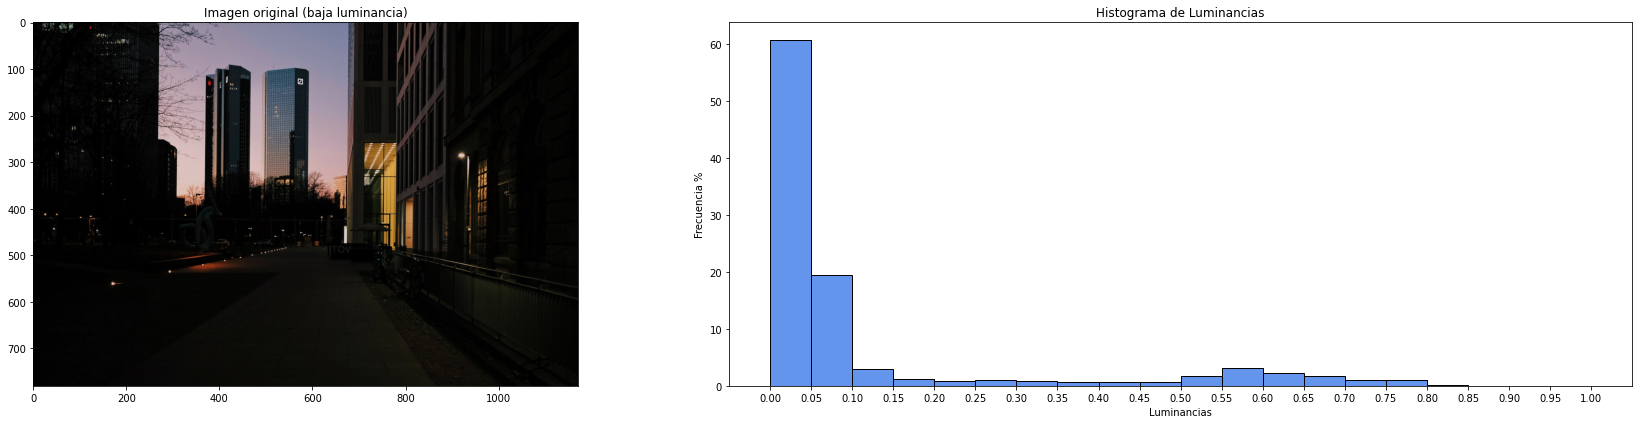

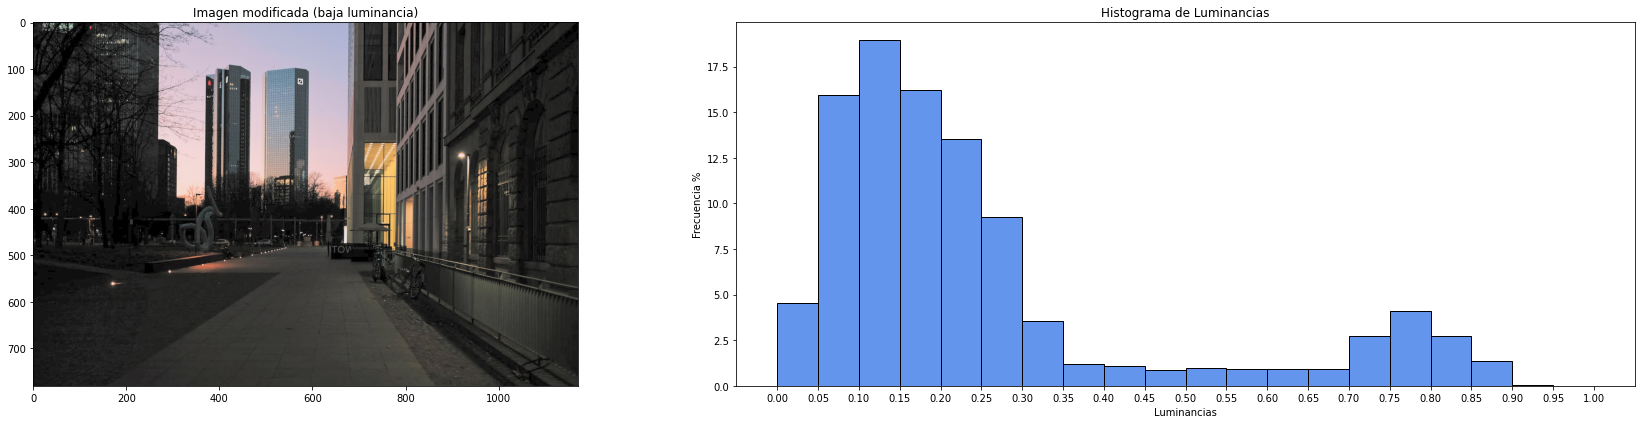

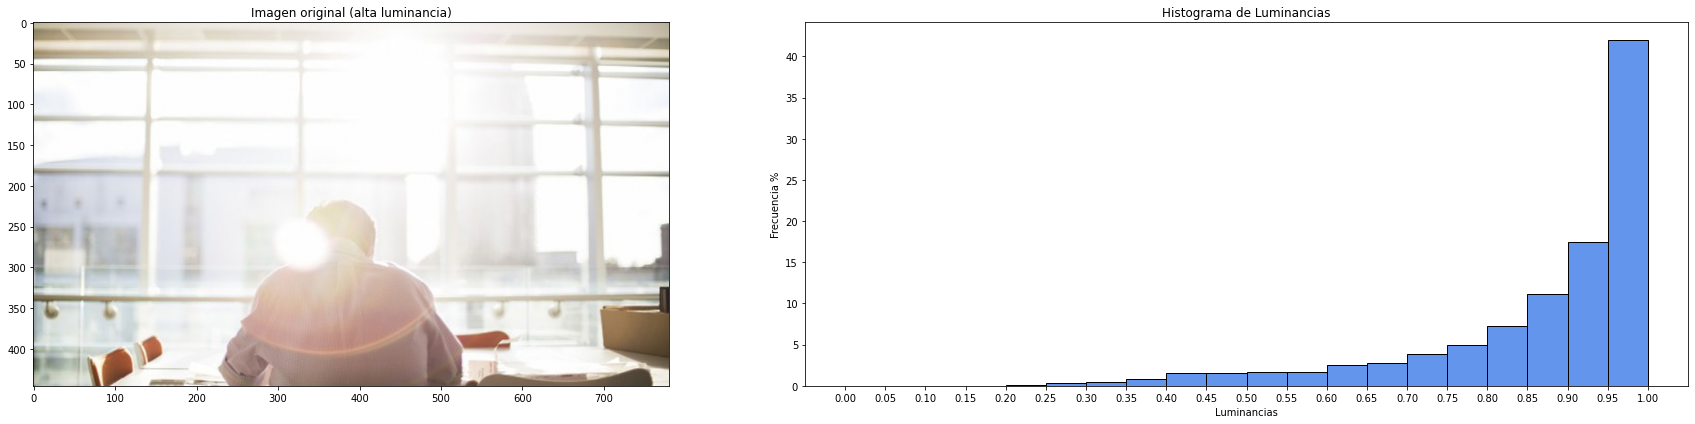

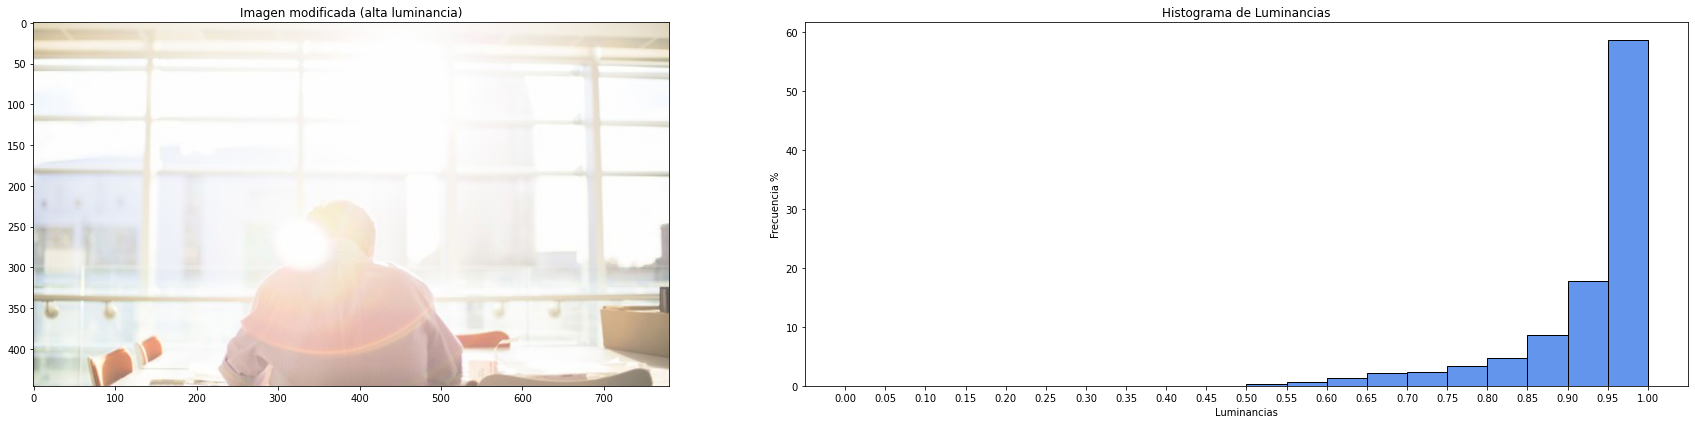

In [43]:
counters = 20

counts_relative_freq6, bins6 = generate_histo(low_Y_yiq[:,:,0], 0, 1, counters)
plot_image_histo(low_Y, counts_relative_freq6, bins6, counters, figsize=(25,6), title='Imagen original (baja luminancia)')

YIQ_new = sqrt_filter(low_Y)

counts_relative_freq_mod, bins_mod = generate_histo(YIQ_new[:,:,0], 0, 1, counters)
image_2_mod_rgb = yiq2rgb(YIQ_new)
plot_image_histo(image_2_mod_rgb, counts_relative_freq_mod, bins_mod, counters, figsize=(25,6), title='Imagen modificada (baja luminancia)')


counts_relative_freq7, bins7 = generate_histo(high_Y_yiq[:,:,0], 0, 1, counters)
plot_image_histo(high_Y, counts_relative_freq7, bins7, counters, figsize=(25,6), title='Imagen original (alta luminancia)')

YIQ_new = sqrt_filter(high_Y)

counts_relative_freq_mod, bins_mod = generate_histo(YIQ_new[:,:,0],0,1,counters)
image_2_mod_rgb = yiq2rgb(YIQ_new)
plot_image_histo(image_2_mod_rgb, counts_relative_freq_mod, bins_mod, counters, figsize=(25,6), title='Imagen modificada (alta luminancia)')

Observaciones: En este caso ocurre lo opuesto a la función de potencia cuadrática. La función de raiz cuadrada mejora aquellas imágenes con predominancia de luminancias bajas, ya que tenemos pendientes mayores para valores de luminancia más bajos, mientras que para valores de luminancia más altos, la pendiente decrece.
Por otro lado, esto empeora la situación para imágenes con predominancia de pixeles con alta luminancia.
Matemáticamente, al calcular la raíz cuadrada a un valor menor a 1, su resultado siempre será mayor al valor original, por ello es que la luminancia aumenta, favoreciendo aquellas imágenes con baja luminancia.

### 4.4. Función lineal a trozos

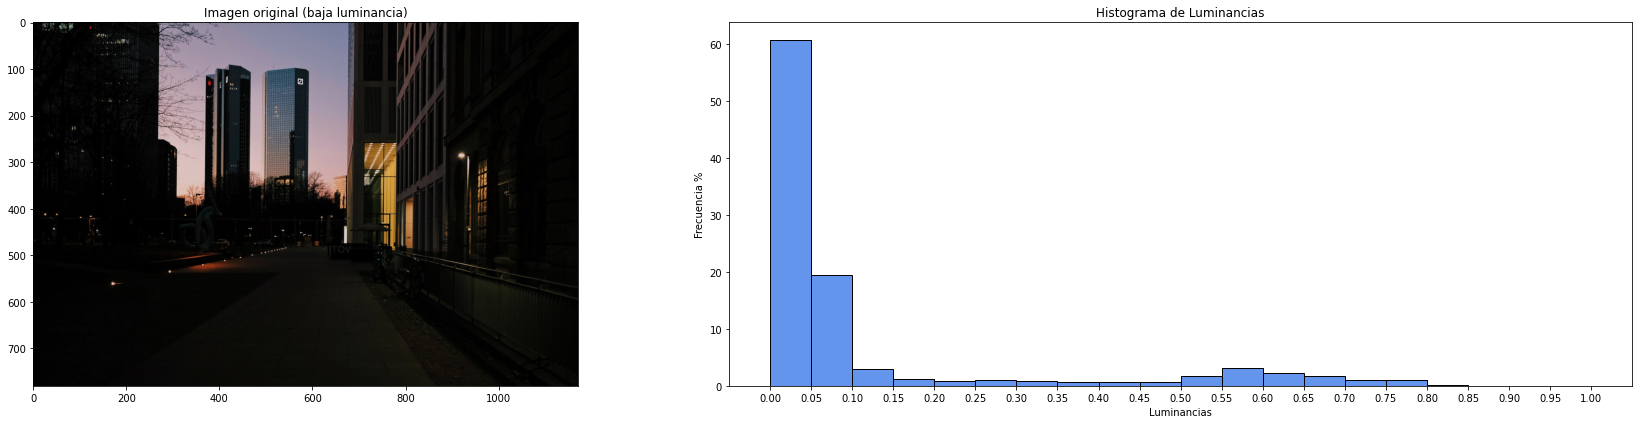

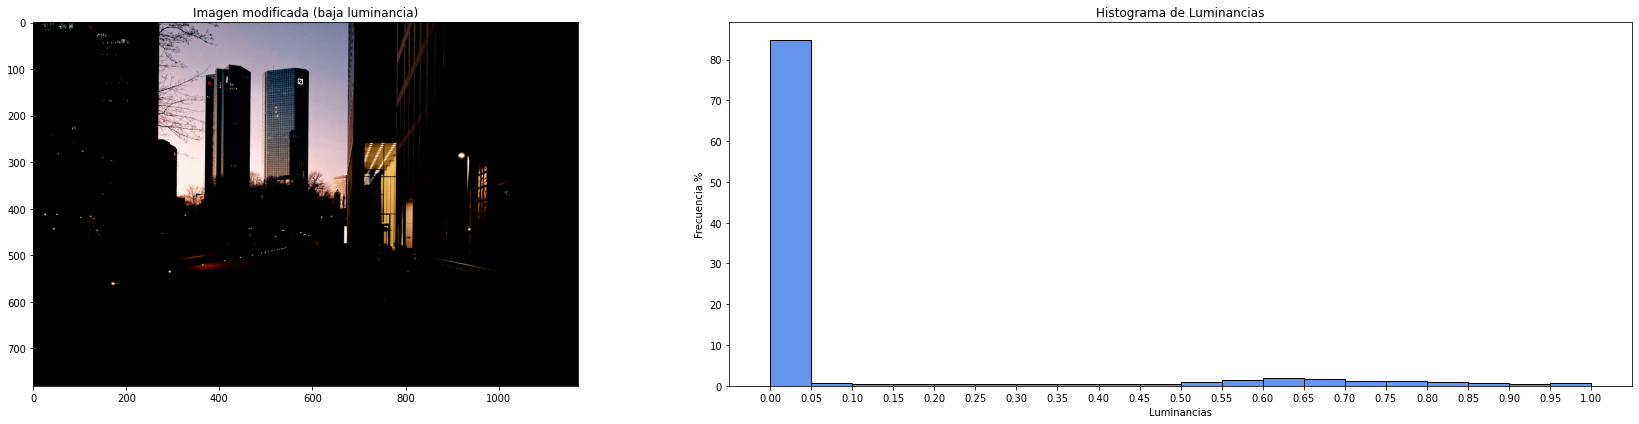

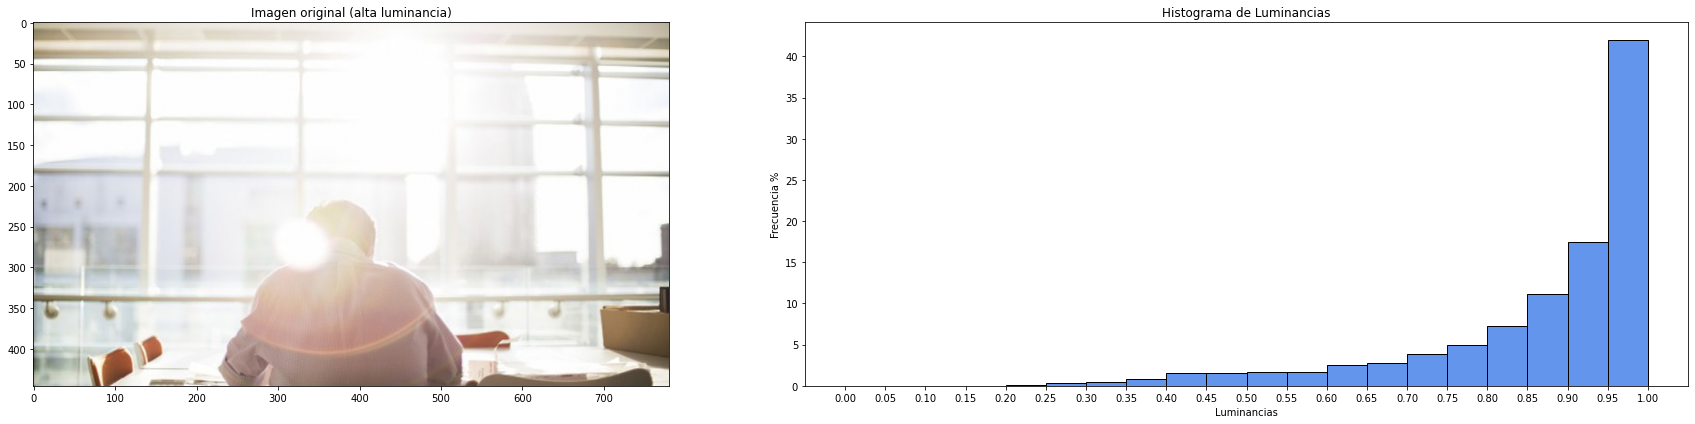

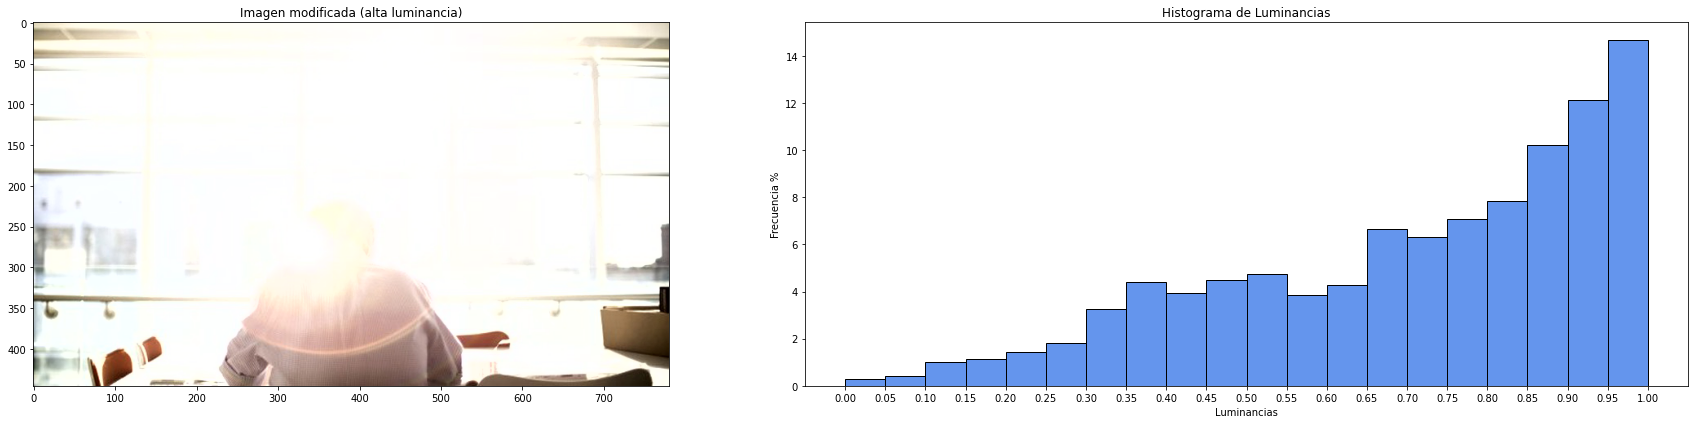

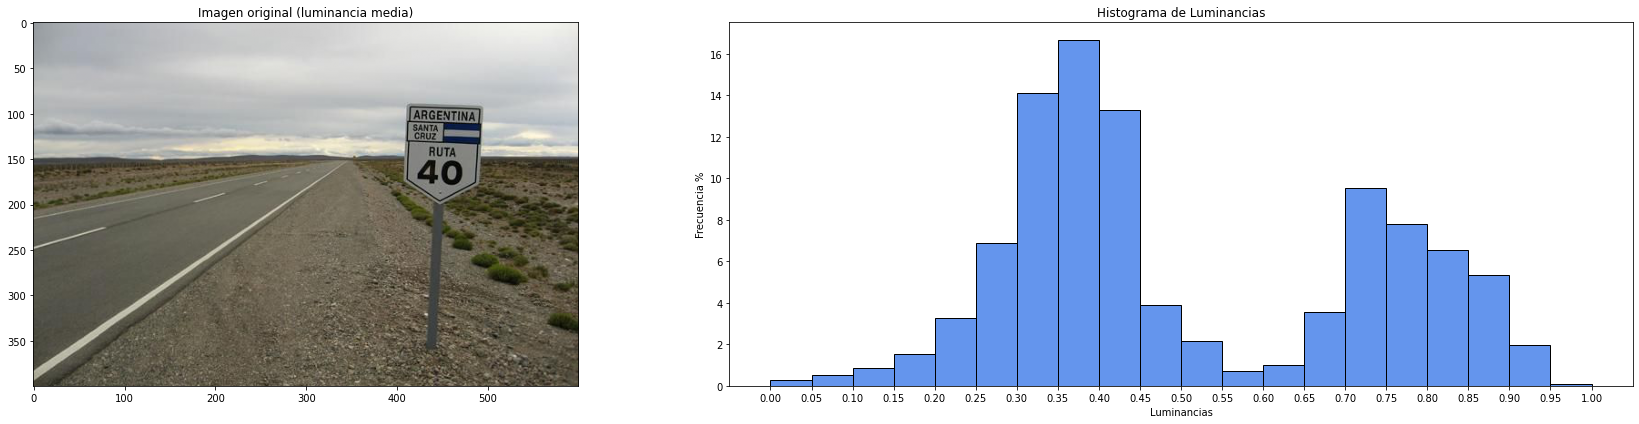

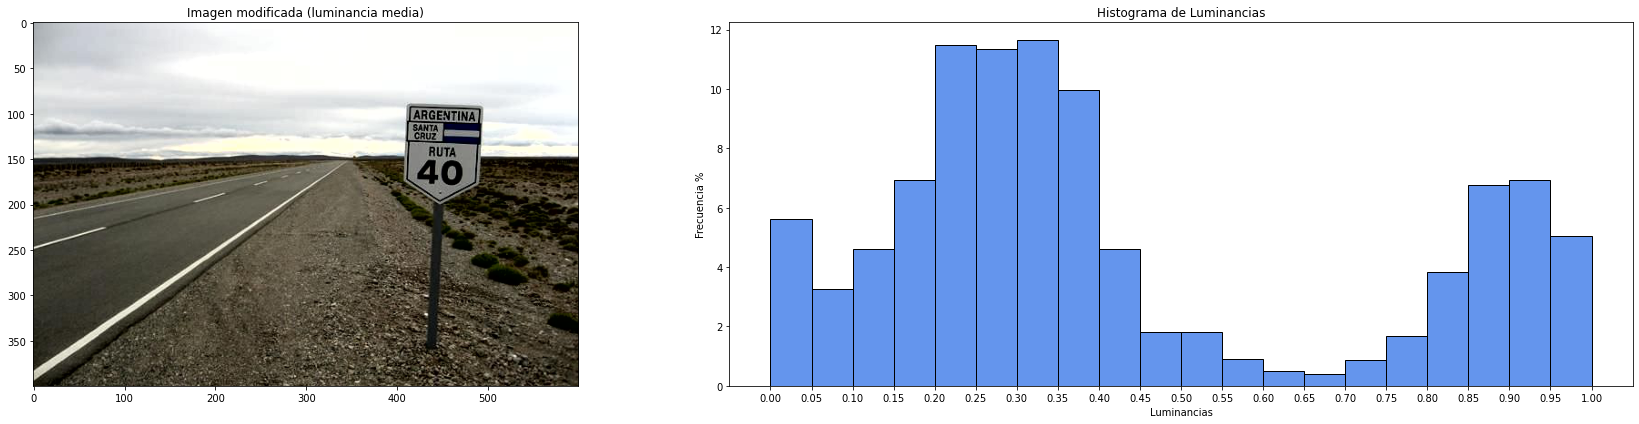

In [44]:
route = get_image(route_url)
normal_yiq = rgb2yiq(route)

counters = 20

#Imagen con baja luminancia
counts_relative_freq8, bins8 = generate_histo(low_Y_yiq[:,:,0], 0, 1, counters)
plot_image_histo(low_Y, counts_relative_freq8, bins8, counters, figsize=(25,6), title='Imagen original (baja luminancia)')

YIQ_new = lineal_filter(low_Y, 0.2, 0.8)

counts_relative_freq_mod, bins_mod = generate_histo(YIQ_new[:,:,0], 0, 1, counters)
image_2_mod_rgb = yiq2rgb(YIQ_new)
plot_image_histo(image_2_mod_rgb, counts_relative_freq_mod, bins_mod, counters, figsize=(25,6), title='Imagen modificada (baja luminancia)')

#Imagen con alta luminancia
counts_relative_freq9, bins9 = generate_histo(high_Y_yiq[:,:,0], 0, 1, counters)
plot_image_histo(high_Y, counts_relative_freq9, bins9, counters, figsize=(25,6), title='Imagen original (alta luminancia)')

YIQ_new = lineal_filter(high_Y, 0.2, 0.8)

counts_relative_freq_mod, bins_mod = generate_histo(YIQ_new[:,:,0], 0 ,1, counters)
image_2_mod_rgb = yiq2rgb(YIQ_new)
plot_image_histo(image_2_mod_rgb, counts_relative_freq_mod, bins_mod, counters, figsize=(25,6), title='Imagen modificada (alta luminancia)')


#Imagen con luminancia media
counts_relative_freq10, bins10 = generate_histo(normal_yiq[:,:,0], 0, 1, counters)
plot_image_histo(route, counts_relative_freq10, bins10, counters, figsize=(25,6), title='Imagen original (luminancia media)')

YIQ_new = lineal_filter(route, 0.2, 0.8)

counts_relative_freq_mod, bins_mod = generate_histo(YIQ_new[:,:,0],0,1,counters)
image_2_mod_rgb = yiq2rgb(YIQ_new)
plot_image_histo(image_2_mod_rgb, counts_relative_freq_mod, bins_mod, counters, figsize=(25,6), title='Imagen modificada (luminancia media)')

Observaciones: Se observa como el filtro lineal a trozos aquellas imágenes con valores de luminancia muy alto o muy bajos, dado que este filtro es especialmente útil cuando queremos modificar una imagen cuyo histograma de luminancias no tiene predominancia de píxeles muy oscuros o muy claros, es decir, cuando tiene predominancia de píxeles en la zona media de su histograma. Esto es así, ya que a las zonas límites (píxeles muy oscuros o con mucha luminancia) las clipea a 0 o 1 respectivamente.
El resultado de aplicar este filtro a una imagen con luminancias medias podemos observarlo en la tercer imagen, observando como en este último caso si mejora la calidad de la imagen final.

## 5. Conclusiones

* Se puede apreciar como un incremento en el número de contadores conlleva a una mayor resolución en los porcentajes de frecuencias de luminancias. Es decir, al incrementar el numero de contadores, el histograma brinda información más detallada sobre los pixeles que tienen mayor o menor predominancia en la imagen. Pero, tomar un valor de contadores demasiado alto tampoco es tan beneficioso, se observa como con un valor de contadores entre 10 y 20 ya nos brinda suficiente información en cuanto a la distribución de luminancias en la imagen.

* En cuanto a la multiplicación de los valores de luminancia por un valor alfa constante, se observa que esto no corrige los errores debidos a la falta o el exceso de luminancia en una imagen, dado que se alteran pixeles que poseen valores de luminancia correctos. Por ello se debe encontrar una forma de modificar aquellos pixeles que tengan valores de luminancia muy bajos, o muy altos, sin alterar los demás. Es decir, se debe lograr un histograma de luminancias mas equilibrado.

* Luego de haber analizado 3 filtros (potencia cuadrática, raíz cuadrática y lineal a trozos) se puede concluir que, antes de aplicar cualquier filtro es necesario analizar su histograma de luminancia, ya que este influye en la decisión del filtro a emplear.

  -Para imágenes con predominancia de luminancias bajas --> filtro de raíz cuadrática

  -Para imágenes con predominancia de luminancias altas --> filtro de potencia cuadrática

  -Para imágenes con predominancia de luminancias medias --> filtro lineal a trozos